In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#random


In [ ]:
seed = 666
# python RNG
import random
random.seed(seed)
# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
# numpy RNG
import numpy as np
np.random.seed(seed)

#dataset 0 task2 +GAN

In [ ]:
#download model
import requests
#https://drive.google.com/file/d/19_MUc4xunKaz3mSTEM1W_Kl3-clS4hnP/view?usp=sharing # model2
#https://drive.google.com/file/d/1AxJpvvPMDY0YsrV9V7qgeTDtoHy7Q--w/view?usp=sharing #model 3
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
name="__main__3"#https://drive.google.com/file/d/1f1pSdmwjS5ZBTqIxjVY_DWiofWB1xhsd/view?usp=sharing
#if name == "__main__":#model2
#    file_id = '19_MUc4xunKaz3mSTEM1W_Kl3-clS4hnP'
#    destination = 'cgan_generator.h5'
#    download_file_from_google_drive(file_id, destination)
if name == "__main__1":#model3 class (4)
    file_id = '1AxJpvvPMDY0YsrV9V7qgeTDtoHy7Q--w'
    destination = 'cgan_generator.h5'
    download_file_from_google_drive(file_id, destination)  
    class_m=4
#if name == "__main__2":#model4 class 4
#    file_id = '1f1pSdmwjS5ZBTqIxjVY_DWiofWB1xhsd'
#    destination = 'cgan_generator.h5'
#    download_file_from_google_drive(file_id, destination)  
if name == "__main__3":#model5 class (8)
    file_id = '11RdouSdoT6abK3tDnoo_YEl_RFPSyUeZ'
    destination = 'cgan_generator.h5'
    download_file_from_google_drive(file_id, destination)     
    class_m=8       

In [ ]:
!git clone https://github.com/zae-bayern/elpv-dataset

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2686, done.
remote: Total 2686 (delta 0), reused 0 (delta 0), pack-reused 2686
Receiving objects: 100% (2686/2686), 90.79 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
dataset_id=0
dataset_name="cells_eng"

In [ ]:
import os
os.makedirs("/content/Task_Training_Input"+str(dataset_id), exist_ok=True)

In [ ]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]


# load model
model = load_model('/content/cgan_generator.h5')
# generate images
latent_points, labels = generate_latent_points(100, class_m*2000)
# specify labels
labels = asarray([x for _ in range(2000) for x in range(class_m)])
print(labels)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
X=(X*255)
#save_plot(X, 4,100)
from PIL import Image#51,32
import numpy as np
from IPython.display import display
names_=[]
classes_=[]
cl_unique=list(set(list(labels)))
counters=[0]*len(cl_unique)
lis=[]
if class_m==8 and plus==False:
  lis={0: 589, 1: 114, 2: 32, 3: 257, 4: 376, 5: 75, 6: 36, 7: 200}#norm
#lis={0: 589, 1: 114, 2: 1, 3: 1, 4: 376, 5: 75, 6: 1, 7: 1}#n1
if class_m==8 and plus==True:
  lis={0: 589, 1: 114, 2: 32-300, 3: 257-300, 4: 376, 5: 75, 6: 36-300, 7: 200-300}#n2
if class_m==4 and plus==False:
  lis={0: 965, 1: 189, 2: 68, 3: 457}# 4 classes
if class_m==4 and plus==True:
  lis={0: 965, 1: 189, 2: 68, 3: 457}# 4 classes plus 300
c__1=0
c__2=0
c__3=0
for i in range(int(X.shape[0])):
  #print(labels[i])
  if counters[labels[i]]>=lis[0]-lis[labels[i]]:
    continue
  counters[labels[i]]+=1   
#  if labels[i]==0:
#    continue
#  if labels[i]==1:
#    if c__1>770:
#      continue
#    c__1+=1
#  if labels[i]==2:
#    if c__2>880:
#      continue
#    c__2+=1
#  if labels[i]==3:
#    if c__3>500:
#      continue
#    c__3+=1      
  classes_.append(labels[i])
  names_.append("c_"+str(i))
  PIL_image = Image.fromarray(X[i].reshape(224,224))
  PIL_image = PIL_image.convert("L")
  #display(PIL_image)
  PIL_image.save("/content/Task_Training_Input0/"+"c_"+str(i)+".png")


[0 1 2 ... 5 6 7]


In [ ]:
import math
import pandas as pd
import numpy as np
import shutil
df = pd.read_csv("/content/elpv-dataset/labels.csv",delim_whitespace=True ,names=["image","prob","type"])
li=[]
for i in list(df["image"]):
  word=i.split("/")[1]
  li.append(word.split(".")[0])
df["image"]=li
#print(df)
classes=[]
for index, row in df.iterrows():
  shutil.copy2("/content/elpv-dataset/images/"+row["image"]+".png", "/content/Task_Training_Input"+str(dataset_id)+"/")
  c=0
  if row["prob"]== 0.0 :
    c=0
  elif row["prob"]== 0.3333333333333333 :
    c=1  
  elif row["prob"]== 0.6666666666666666 :  
    c=2
  elif row["prob"]== 1.0 :      
    c=3
  if row["type"]== "mono":
    c+=4
  classes.append(c)
df["class"]=classes
df=df[["image","class"]]

from sklearn.utils import shuffle
df = shuffle(df,random_state=666)
df

,image,class
909,cell0910,4
1591,cell1592,4
540,cell0541,0
1747,cell1748,1
2482,cell2483,1
...,...,...
1993,cell1994,0
70,cell0071,0
1950,cell1951,0
1922,cell1923,2


In [ ]:
from sklearn.model_selection import train_test_split
train_df_cell_all, test_df_cell_all = train_test_split(df, test_size=0.2,random_state=42, stratify= df["class"])
df_cell_all=pd.DataFrame(df)
df=train_df_cell_all 

# set prepare step

In [ ]:
from sklearn.model_selection import train_test_split

train_df_, test_df = train_test_split(df, test_size=0.2,random_state=42, stratify= df["class"])

In [ ]:
train_df=train_df_.copy()

In [ ]:
for i in range(len(names_)):
  new_row = {'image':names_[i], 'class':classes_[i]}
#append row to the dataframe
  train_df = train_df.append(new_row, ignore_index=True)
train_df = shuffle(train_df,random_state=666)  

# Training regression

In [ ]:
f = lambda x: 0.0 if x==0 or x==4 else (0.3333333333333333 if x==1 or x==5 else (0.6666666666666666 if x==2 or x==6 else 1.0))
train_df['class'] = train_df['class'].map(f)
test_df['class'] = test_df['class'].map(f)
test_df_cell_all['class'] = test_df_cell_all['class'].map(f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_df["is_valid"] = False
test_df["is_valid"] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
balanced = pd.concat([train_df, test_df]).reset_index(drop=True)
print(balanced)
balanced.to_csv("labels_balanced.csv", index=False)

         image     class  is_valid
0        c_126  0.666667     False
1       c_1573  0.333333     False
2       c_2185  0.333333     False
3        c_943  1.000000     False
4       c_1815  1.000000     False
...        ...       ...       ...
6327  cell0129  0.000000      True
6328  cell2348  0.000000      True
6329  cell1248  0.000000      True
6330  cell1666  1.000000      True
6331  cell1978  0.000000      True

[6332 rows x 3 columns]


In [ ]:
!curl https://course.fast.ai/setup/colab | bash
from fastai.vision import *
p_all=0.7
p=0.9
additional_aug=[#dihedral(k=3, p=p_all), 
                #jitter(magnitude=(0.01,0.01), p=p_all)]#, 
                #contrast(scale=(1.1,1.25), p=p_all)
                ]
#tfms = get_transforms(max_lighting=0.4,max_zoom=1.5, max_warp=0.6, p_affine=p, p_lighting=p_all, flip_vert=True,do_flip=True)#0.77
#tfms = get_transforms(max_lighting=0.4, max_warp=0.6, p_affine=p, p_lighting=p_all, flip_vert=True,do_flip=True)#0.77
tfms = get_transforms(flip_vert=True,do_flip=True)#0.77
                     # xtra_tfms=additional_aug)
if dataset_id==0 or dataset_id==1 or dataset_id ==3 or dataset_id==4 or dataset_id==5 or dataset_id==6 or dataset_id==7 :
  src = (ImageList.from_csv("./", "labels_balanced.csv", folder="Task_Training_Input"+str(dataset_id), suffix=".png")
                .split_from_df() # uses `is_valid` column
                .label_from_df())
else :
  src = (ImageList.from_csv("./", "labels_balanced.csv", folder="Task_Training_Input"+str(dataset_id), suffix=".png")
                .split_from_df() # uses `is_valid` column
                .label_from_df())


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'
100  9127    0  9127    0     0  37405      0 --:--:-- --:--:-- --:--:-- 37405


In [ ]:
import os
os.makedirs("/content/directory", exist_ok=True)

os.makedirs("/content/directory", exist_ok=True)
os.makedirs("/content/directory/train", exist_ok=True)
os.makedirs("/content/directory/val", exist_ok=True)
os.makedirs("/content/directory/train/pos", exist_ok=True)
os.makedirs("/content/directory/val/pos", exist_ok=True)
os.makedirs("/content/directory/train/neg", exist_ok=True)
os.makedirs("/content/directory/val/neg", exist_ok=True)
for i, data in train_df.iterrows():
     if(data["class"]==0):
       if dataset_id==1 or dataset_id==3 or dataset_id==4 or dataset_id==5 or dataset_id==7 or dataset_id==6  :
         shutil.copy2("/content/Task_Training_Input"+str(dataset_id)+"/"+data["image"]+".png", "/content/directory/train/pos")
       else:
         shutil.copy2("/content/Task_Training_Input"+str(dataset_id)+"/"+data["image"]+".png", "/content/directory/train/pos")
     else:
       if dataset_id==1 or dataset_id==3 or dataset_id==4 or dataset_id==5 or dataset_id==7 or dataset_id==6 :
         shutil.copy2("/content/Task_Training_Input"+str(dataset_id)+"/"+data["image"]+".png", "/content/directory/train/neg")
       else:
         shutil.copy2("/content/Task_Training_Input"+str(dataset_id)+"/"+data["image"]+".png", "/content/directory/train/neg")


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
if dataset_id==1 or dataset_id==5:
  resize = transforms.Resize((150,150))
else:
  resize = transforms.Resize((224,224))  


data_transforms_new = {
    'train': transforms.Compose([
                    resize,
                    #transforms.RandomHorizontalFlip(),
                    transforms.RandomVerticalFlip(),
                    #color_distort,
                    transforms.ToTensor()
                                  
        #transforms.Normalize((0.7106, 0.3751, 0.4817), (0.6935, 0.8864, 0.9258)),      
    ]),
    'val': transforms.Compose([
        resize,
        #color_distort,
        transforms.ToTensor(),
        #transforms.Normalize((0.7106, 0.3751, 0.4817), (0.6935, 0.8864, 0.9258)),
       
        
    ])
}

image_datasets_={"train":datasets.ImageFolder("/content/directory/train",data_transforms_new["train"])}

loader = torch.utils.data.DataLoader(
    image_datasets_["train"],
    batch_size=8,
    num_workers=3,
    shuffle=False,pin_memory=False)


def online_mean_and_sd(loader):
    """Compute the mean and sd in an online fashion

        Var[x] = E[X^2] - E^2[X]
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)
    #for  (images,x) in (loader):
    #  print(images)
    for images,_ in loader:

        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

        cnt += nb_pixels

    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)
std=online_mean_and_sd(loader)
print(std)#mean not zero and std is not 1, this will give u mean and std

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(tensor([0.6087, 0.6087, 0.6087]), tensor([0.1461, 0.1461, 0.1461]))


In [ ]:
import warnings
     
warnings.filterwarnings("ignore")
my_norm=(std[0].tolist(), std[1].tolist())
if dataset_id==1 or dataset_id==5:
  data = (src.transform(tfms, size=150)
        .databunch(num_workers=0).normalize(my_norm))
elif dataset_id==0:
  data = (src.transform(tfms, size=224)
        .databunch(num_workers=0).normalize(my_norm))  
else:
  data = (src.transform(tfms, size=224)
        .databunch(num_workers=0).normalize(my_norm)) 
data.batch_size=16

In [ ]:
class SaveBestModel(Recorder):
    names=""
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = SaveBestModel.names
        self.name1 = SaveBestModel.names + "root"
        self.best_loss = None
        self.best_acc = None
        self.best_loss1 = None
        self.best_acc1 = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc1,acc = metrics[0], metrics[2],metrics[3]
        if self.best_acc == None or acc < self.best_acc:
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best mean_absolute_error {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss > self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name+"_"+str(loss)}')
            print("mean_absolute_error is eq,Save the lower loss {:.5f}".format(self.best_loss))

        if self.best_acc1 == None or acc1 < self.best_acc1:
            self.best_acc1 = acc1
            self.best_loss1 = loss
            self.learn.save(f'{self.name1}')
            print("Save the best root_mean_squared_error {:.5f}".format(self.best_acc1))
        elif acc1 == self.best_acc1 and  loss > self.best_loss:
            self.best_loss1 = loss
            self.learn.save(f'{self.name1+"_"+str(loss)}')
            print("root_mean_squared_error is eq,Save the lower loss {:.5f}".format(self.best_loss1))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [ ]:
#"vgg19","vgg16","densenet169","densenet201","resnet101","resnet152"
SaveBestModel.names ="densenet201"
learn = cnn_learner(data, models.densenet201, metrics=[mean_squared_error,root_mean_squared_error,mean_absolute_error],callback_fns=SaveBestModel)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


epoch,train_loss,valid_loss,mean_squared_error,root_mean_squared_error,mean_absolute_error,time
epoch,train_loss,valid_loss,mean_squared_error,root_mean_squared_error,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


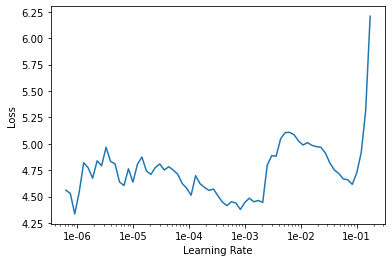

In [ ]:
try:
  learn.lr_find()
except:
  learn.recorder.plot()
#learn.lr_find()#wd=1e-2)


#real train

In [ ]:
#learn.recorder.plot()

In [ ]:
epochs=70
lr = 0.004
print(slice(lr))
learn.fit_one_cycle(epochs,slice(lr))#,slice(1e-6, 1e-2))#,wd=1e-2)

slice(None, 0.004, None)


epoch,train_loss,valid_loss,mean_squared_error,root_mean_squared_error,mean_absolute_error,time
epoch,train_loss,valid_loss,mean_squared_error,root_mean_squared_error,mean_absolute_error,time
0,2.414989,0.976291,0.976291,0.972742,0.772514,01:51
1,1.371655,0.422046,0.422046,0.640286,0.513529,01:49
2,0.692036,0.422544,0.422544,0.643363,0.506605,01:49
3,0.257862,0.251887,0.251887,0.495589,0.398555,01:49
4,0.109607,0.134204,0.134204,0.358637,0.275163,01:49
5,0.096567,0.114277,0.114277,0.333317,0.281107,01:49
6,0.100923,0.162024,0.162024,0.394651,0.293824,01:49
7,0.089122,0.158014,0.158014,0.392940,0.315780,01:49
8,0.090485,0.142568,0.142568,0.373487,0.303979,01:49


Save the best mean_absolute_error 0.77251
Save the best root_mean_squared_error 0.97274
Save the best mean_absolute_error 0.51353
Save the best root_mean_squared_error 0.64029
Save the best mean_absolute_error 0.50660
Save the best mean_absolute_error 0.39856
Save the best root_mean_squared_error 0.49559
Save the best mean_absolute_error 0.27516
Save the best root_mean_squared_error 0.35864
Save the best root_mean_squared_error 0.33332
Save the best mean_absolute_error 0.26092
Save the best root_mean_squared_error 0.32746
Save the best mean_absolute_error 0.21943
Save the best root_mean_squared_error 0.29411
Save the best mean_absolute_error 0.21129
Save the best root_mean_squared_error 0.28777
Save the best mean_absolute_error 0.19201
Save the best root_mean_squared_error 0.27051
Save the best root_mean_squared_error 0.27034
Save the best root_mean_squared_error 0.24962
Save the best mean_absolute_error 0.19102
Save the best mean_absolute_error 0.17488
Save the best root_mean_squared_

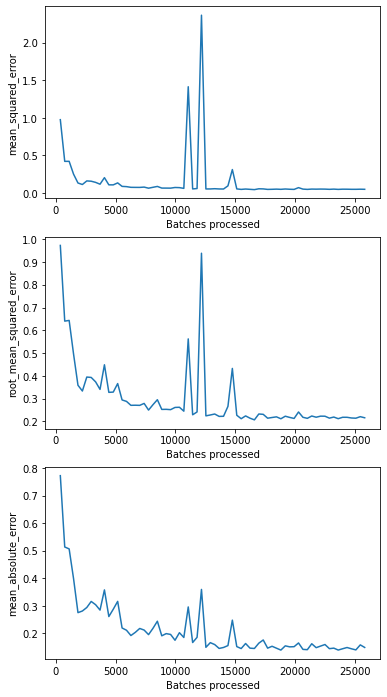

In [ ]:
learn.recorder.plot_metrics()

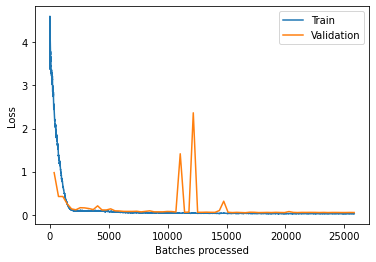

In [ ]:
learn.recorder.plot_losses()

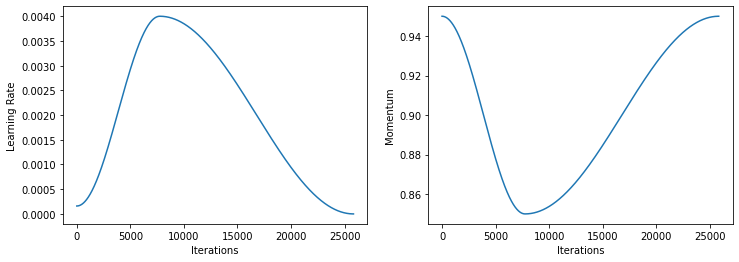

In [ ]:
learn.recorder.plot_lr(show_moms=True)

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

In [ ]:
learn.load("/content/models/"+SaveBestModel.names)
learn.validate()

[0.050245002, tensor(0.0502), tensor(0.2114), tensor(0.1392)]

In [ ]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n
y_labels=[]
pred=[]
for index, row in test_df_cell_all.iterrows():
  img = open_image("/content/Task_Training_Input0/"+row["image"]+".png")
  x,y,z=learn.predict(img)
  z=float(z)
  li=[z,abs(z-0.3333333333333333),abs(z-0.6666666666666666),abs(z-1.0)]
  labels=[0,0.33,0.66,1.0]
  su=sum(li)
  li=[1-(i /su) for i in li]
  one=li.index(max(li))
  pred.append(one)
  y_labels.append(labels.index(truncate(row["class"], 2)))
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_labels, pred))
print(confusion_matrix(y_labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       302
           1       0.30      0.51      0.37        59
           2       0.24      0.48      0.32        21
           3       0.93      0.68      0.79       143

    accuracy                           0.72       525
   macro avg       0.59      0.62      0.58       525
weighted avg       0.80      0.72      0.75       525

[[243  48   7   4]
 [ 25  30   3   1]
 [  4   5  10   2]
 [  7  18  21  97]]


In [ ]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n
y_labels=[]
pred=[]
pred_limited=[]
for index, row in test_df_cell_all.iterrows():
  img = open_image("/content/Task_Training_Input0/"+row["image"]+".png")
  x,y,z=learn.predict(img)
  z=float(z)
  li=[z,abs(1.0-z)]
  labels=[0,0.33,0.66,1.0]
  labels1=[0,0,1,1]
  su=sum(li)
  li=[1-(i /su) for i in li]
  #print(li)
  one=li.index(max(li))
  pred.append(one)
  lim=0
  if z >0.50:
    lim=1
  pred_limited.append(lim)
  ind=labels1[labels.index(truncate(row["class"], 2))]
  y_labels.append(ind)
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(y_labels, pred))
print(confusion_matrix(y_labels, pred))
print("_________________")
print(classification_report(y_labels, pred_limited))
print(confusion_matrix(y_labels, pred_limited))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       361
           1       0.90      0.79      0.84       164

    accuracy                           0.91       525
   macro avg       0.90      0.88      0.89       525
weighted avg       0.91      0.91      0.90       525

[[346  15]
 [ 34 130]]
_________________
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       361
           1       0.85      0.82      0.83       164

    accuracy                           0.90       525
   macro avg       0.88      0.88      0.88       525
weighted avg       0.90      0.90      0.90       525

[[337  24]
 [ 30 134]]


In [ ]:
learn.export()
#shutil.move("/content/export.pkl", "/content/drive/My Drive/_"+SaveBestModel.names+"_exported_"+dataset_name+"_"+str(epochs)+".pkl")

In [ ]:
os.makedirs("/content/drive/My Drive/novel_methods", exist_ok=True)
shutil.move("/content/export.pkl", "/content/drive/My Drive/novel_methods/_"+SaveBestModel.names+"_elpv_dataset"+"_8classes_plus"+".pkl")

'/content/drive/My Drive/novel_methods/expermental/_densenet201_elpv_dataset_8classes_plus.pkl'

In [ ]:
#balanced.to_csv("/content/drive/My Drive/_"+dataset_name+"_labels_balanced.csv", index=False)